In [1]:
import nltk
import pandas as pd
import numpy as np
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [2]:
dictionary = pd.read_excel("dict.xlsx")
dictionary

,Kata,Sense,Definisi,Contoh,Sumber
0,Kabur,ka.bur¹,1. a tidak dapat melihat sesuatu dengan jelas ...,1. matanya telah kabur dimakan umur,https://kbbi.kemdikbud.go.id/entri/kabur
1,Kabur,ka.bur²,1. v berlari cepat-cepat; melarikan diri\n2. v...,2. pengebut kabur dikejar Polantas,https://kbbi.kemdikbud.go.id/entri/kabur
2,Kabur,ka.bur³,n kumbang kelapa,NaN,https://kbbi.kemdikbud.go.id/entri/kabur
3,Genting,gen.ting¹,"1. a kecil (tipis, sempit) pada bagian tengah\...",1. pinggangnya genting\n2. tali ini genting\n3...,https://kbbi.kemdikbud.go.id/entri/genting
4,Genting,gen.ting²,n tutup atap rumah yang terbuat dari tanah lia...,NaN,https://kbbi.kemdikbud.go.id/entri/genting
5,Hawa,ha.wa¹,1. n campuran berbagai-bagai gas yang meliputi...,1. angin terjadi karena gerakan hawa; bukalah ...,https://kbbi.kemdikbud.go.id/entri/hawa
6,Hawa,ha.wa²,n keinginan; nafsu,NaN,https://kbbi.kemdikbud.go.id/entri/hawa
7,Hawa,Ha.wa³,"1. n Siti Hawa, istri Nabi Adam a.s.\n2. n cak...",2. kaum hawa,https://kbbi.kemdikbud.go.id/entri/hawa


In [3]:
# Untuk preprocessing jika diperlukan
# for i in range (len(dictionary)):
#     newSentence = str(dictionary.iloc[i,2])
#     newSentence = re.sub(r"\d+", "", newSentence)
#     #Remove Symbol
#     newSentence = re.sub(r'[^\w]', ' ', newSentence)
#     #remove whitespace leading & trailing
#     newSentence = newSentence.strip()
#     #remove multiple whitespace into single whitespace
#     newSentence = re.sub('\s+',' ',newSentence) 
#     dictionary.iloc[i,2] = newSentence.lower()
#     newSentence = str(dictionary.iloc[i,3])
#     newSentence = re.sub(r"\d+", "", newSentence)
#     #Remove Symbol
#     newSentence = re.sub(r'[^\w]', ' ', newSentence)
#     #remove whitespace leading & trailing
#     newSentence = newSentence.strip()
#     #remove multiple whitespace into single whitespace
#     newSentence = re.sub('\s+',' ',newSentence) 
#     dictionary.iloc[i,3] = newSentence.lower()
# dictionary

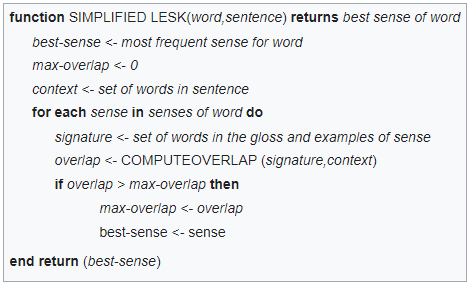

In [15]:
def computeOverlap(signature, context):
    return len(set(signature) & set(context))
def simplifiedLesk(word, sentence):
    score = []
    bestSense = None
    maxOverlap = 0
    context = nltk.tokenize.word_tokenize(sentence)
    idxSense = dictionary.index[dictionary['Kata'] == word].tolist()
    for item in idxSense:
        signature = str(dictionary.iloc[item,2]) + " " +  str(dictionary.iloc[item,3])
        signature = nltk.tokenize.word_tokenize(signature)
#         print(context)
#         print(signature)
        overlap = computeOverlap(signature, context)
        score.append("Sense : (" + dictionary.iloc[item,1] + ") Jumlah Overlap: " + str(overlap))
        if overlap > maxOverlap:
            maxOverlap = overlap
            bestSense = dictionary.iloc[item,1] + " definisi: " + dictionary.iloc[item,2]
    return bestSense, score


# Dengan Stemmer Sastrawi
def simplifiedLeskStem(word, sentence):
    # create stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    score = []
    bestSense = None
    maxOverlap = 0
    context = nltk.tokenize.word_tokenize(stemmer.stem(sentence))
    idxSense = dictionary.index[dictionary['Kata'] == word].tolist()
    for item in idxSense:
        signature = str(dictionary.iloc[item,2]) + " " +  str(dictionary.iloc[item,3])
        signature = nltk.tokenize.word_tokenize(stemmer.stem(signature))
#         print(signature)
        overlap = computeOverlap(signature, context)
        score.append("Sense : (" + dictionary.iloc[item,1] + ") Jumlah Overlap: " + str(overlap))
        if overlap > maxOverlap:
            maxOverlap = overlap
            bestSense = dictionary.iloc[item,1] + " definisi: " + dictionary.iloc[item,2]
    return bestSense, score

In [16]:
kalimatContoh = "dia kabur karena dikejar anjing"
# kalimatContoh = "penglihatan ku kabur dimakan usia"
kata = "Kabur"
print("Kalimat yang dites:", kalimatContoh)
print()
print("Tanpa Stemmer")
sense, score = simplifiedLesk(kata, kalimatContoh)
print("Sense:", sense)
print("Perhitungan Score: \n", score )
print("\nDengan Stemmer")
sense, score = simplifiedLeskStem(kata, kalimatContoh)
print("Sense:", sense)
print("Perhitungan Score: \n", score )

Kalimat yang dites: dia kabur karena dikejar anjing

Tanpa Stemmer
Sense: ka.bur² definisi: 1. v berlari cepat-cepat; melarikan diri
2. v ki meninggalkan tugas (pekerjaan, keluarga, dan sebagainya) tanpa pamit; menghilang
Perhitungan Score: 
 ['Sense : (ka.bur¹) Jumlah Overlap: 1', 'Sense : (ka.bur²) Jumlah Overlap: 2', 'Sense : (ka.bur³) Jumlah Overlap: 0']

Dengan Stemmer
Sense: ka.bur² definisi: 1. v berlari cepat-cepat; melarikan diri
2. v ki meninggalkan tugas (pekerjaan, keluarga, dan sebagainya) tanpa pamit; menghilang
Perhitungan Score: 
 ['Sense : (ka.bur¹) Jumlah Overlap: 1', 'Sense : (ka.bur²) Jumlah Overlap: 2', 'Sense : (ka.bur³) Jumlah Overlap: 0']


In [21]:
kalimatContoh = "hawa nafsu keinginan orang untuk membeli mainan sangat tinggi"
# kalimatContoh = "hawa pegunungan di pagi hari sangat sejuk"
kata = "Hawa"
print("Kalimat yang dites:", kalimatContoh)
print()
print("Tanpa Stemmer")
sense, score = simplifiedLesk(kata, kalimatContoh)
print("Sense:", sense)
print("Perhitungan Score: \n", score )
print("\nDengan Stemmer")
sense, score = simplifiedLeskStem(kata, kalimatContoh)
print("Sense:", sense)
print("Perhitungan Score: \n", score )

Kalimat yang dites: hawa nafsu keinginan orang untuk membeli mainan sangat tinggi

Tanpa Stemmer
Sense: ha.wa² definisi: n keinginan; nafsu
Perhitungan Score: 
 ['Sense : (ha.wa¹) Jumlah Overlap: 1', 'Sense : (ha.wa²) Jumlah Overlap: 2', 'Sense : (Ha.wa³) Jumlah Overlap: 1']

Dengan Stemmer
Sense: ha.wa² definisi: n keinginan; nafsu
Perhitungan Score: 
 ['Sense : (ha.wa¹) Jumlah Overlap: 1', 'Sense : (ha.wa²) Jumlah Overlap: 2', 'Sense : (Ha.wa³) Jumlah Overlap: 1']


In [19]:
kalimatContoh = "keadaan terasa genting saat bencana gempa"
# kalimatContoh = "saya memanjat ke atap rumah dengan tangga untuk membenarkan genting"
kata = "Genting"
print("Kalimat yang dites:", kalimatContoh)
print()
print("Tanpa Stemmer")
sense, score = simplifiedLesk(kata, kalimatContoh)
print("Sense:", sense)
print("Perhitungan Score: \n", score )
print("\nDengan Stemmer")
sense, score = simplifiedLeskStem(kata, kalimatContoh)
print("Sense:", sense)
print("Perhitungan Score: \n", score )

Kalimat yang dites: keadaan terasa genting saat bencana gempa

Tanpa Stemmer
Sense: gen.ting¹ definisi: 1. a kecil (tipis, sempit) pada bagian tengah
2. a hampir putus (tentang tali dan sebagainya) 
3. a tegang; berbahaya (tentang keadaan yang mungkin segera menimbulkan bencana perang dan sebagainya)
Perhitungan Score: 
 ['Sense : (gen.ting¹) Jumlah Overlap: 3', 'Sense : (gen.ting²) Jumlah Overlap: 0']

Dengan Stemmer
Sense: gen.ting¹ definisi: 1. a kecil (tipis, sempit) pada bagian tengah
2. a hampir putus (tentang tali dan sebagainya) 
3. a tegang; berbahaya (tentang keadaan yang mungkin segera menimbulkan bencana perang dan sebagainya)
Perhitungan Score: 
 ['Sense : (gen.ting¹) Jumlah Overlap: 3', 'Sense : (gen.ting²) Jumlah Overlap: 0']
